Задача:
Разработать модель машинного обучения, которая будет предсказывать на основе некоторых химических тестов, является ли вино настоящим или поддеоьным.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\mmd28\OneDrive\Рабочий стол\Academic potfolio\Classical Machine Learning\Supervised learning\Classification\data\wine_fraud.csv")

In [3]:
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red


Наша целевая переменная "quality". Выясним, какие значения она содержит.

In [4]:
df['quality'].unique()

array(['Legit', 'Fraud'], dtype=object)

Наша целевая переменаая содержит всего 2 значения 'Legit' и 'Fraud' (настоящее или подделка). Поскольку мы имеем всего 2 значения целевой переменной, значит мы решаем задачу классификации с двумя классами.

<Axes: xlabel='quality', ylabel='count'>

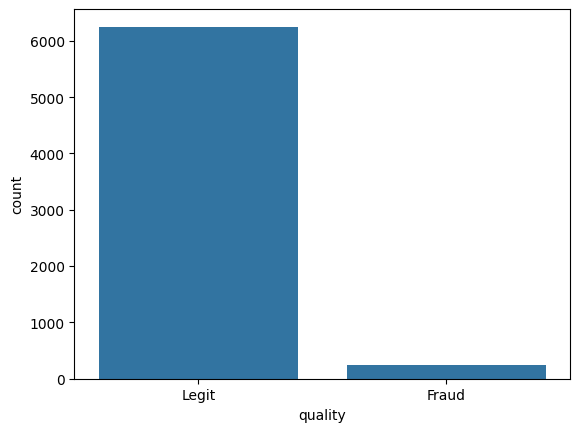

In [5]:
sns.countplot(x='quality', data=df)

мы видим сильный разброс в значениях. Это означает, что датасет не сбаллансирован. 

In [6]:
df['quality'].value_counts()

quality
Legit    6251
Fraud     246
Name: count, dtype: int64

У нас в данных 6251 настоящих вин и всего 246 поддельных.

Посмотрим, есть ли разница в количестве подделок в зависимости от того, красное вино или белое.

<Axes: xlabel='quality', ylabel='count'>

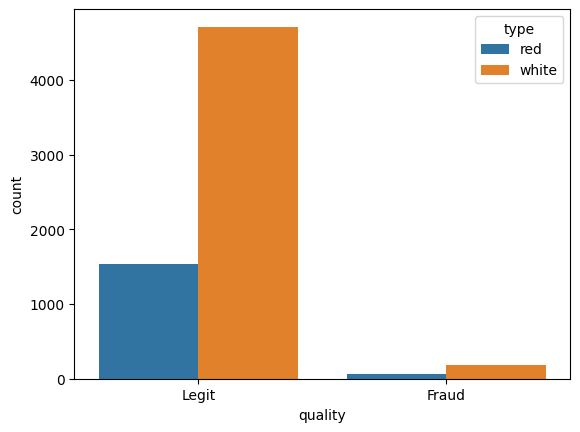

In [7]:
sns.countplot(x='quality', data=df, hue='type')

<Axes: xlabel='type', ylabel='count'>

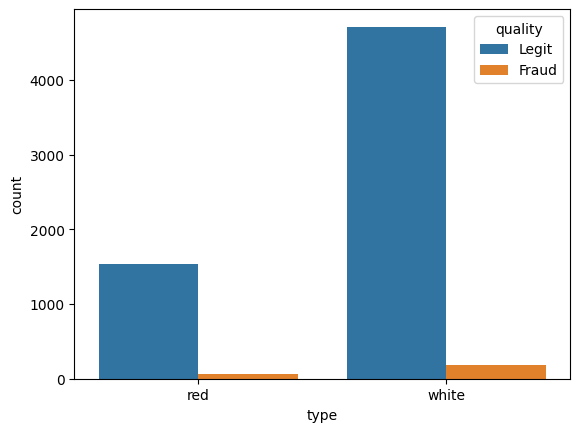

In [8]:
sns.countplot(x='type', data=df, hue='quality')

Посмотрим какой процент красных и какой процент белых вин являются подделкой.

In [10]:
reds = df[df['type'] == 'red']
whites = df[df['type'] == 'white']

In [11]:
# посмотрим спикок поддельных красных вин
reds[reds['quality'] == 'Fraud']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
18,7.4,0.590,0.08,4.4,0.086,6.0,29.0,0.99740,3.38,0.50,9.00,Fraud,red
38,5.7,1.130,0.09,1.5,0.172,7.0,19.0,0.99400,3.50,0.48,9.80,Fraud,red
41,8.8,0.610,0.30,2.8,0.088,17.0,46.0,0.99760,3.26,0.51,9.30,Fraud,red
45,4.6,0.520,0.15,2.1,0.054,8.0,65.0,0.99340,3.90,0.56,13.10,Fraud,red
73,8.3,0.675,0.26,2.1,0.084,11.0,43.0,0.99760,3.31,0.53,9.20,Fraud,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,5.6,0.620,0.03,1.5,0.080,6.0,13.0,0.99498,3.66,0.62,10.10,Fraud,red
1482,7.2,0.580,0.54,2.1,0.114,3.0,9.0,0.99719,3.33,0.57,10.30,Fraud,red
1484,6.8,0.910,0.06,2.0,0.060,4.0,11.0,0.99592,3.53,0.64,10.90,Fraud,red
1505,6.7,0.760,0.02,1.8,0.078,6.0,12.0,0.99600,3.55,0.63,9.95,Fraud,red


In [12]:
whites[whites['quality'] == 'Fraud']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
1645,6.2,0.450,0.26,4.40,0.063,63.0,206.0,0.99400,3.27,0.52,9.8,Fraud,white
1697,9.8,0.360,0.46,10.50,0.038,4.0,83.0,0.99560,2.89,0.30,10.1,Fraud,white
1714,5.5,0.485,0.00,1.50,0.065,8.0,103.0,0.99400,3.63,0.40,9.7,Fraud,white
1746,6.4,0.595,0.14,5.20,0.058,15.0,97.0,0.99510,3.38,0.36,9.0,Fraud,white
1771,7.6,0.480,0.37,0.80,0.037,4.0,100.0,0.99020,3.03,0.39,11.4,Fraud,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6373,7.1,0.240,0.34,1.20,0.045,6.0,132.0,0.99132,3.16,0.46,11.2,Fraud,white
6378,6.0,0.590,0.00,0.80,0.037,30.0,95.0,0.99032,3.10,0.40,10.9,Fraud,white
6403,6.0,0.350,0.46,0.90,0.033,9.0,65.0,0.98934,3.24,0.35,12.1,Fraud,white
6438,5.2,0.405,0.15,1.45,0.038,10.0,44.0,0.99125,3.52,0.40,11.6,Fraud,white


In [13]:
len(reds[reds['quality'] == 'Fraud'])

63

In [14]:
len(whites[whites['quality'] == 'Fraud'])

183

In [15]:
# вычислим %
len(reds[reds['quality'] == 'Fraud']) * 100 / len(reds)

3.9399624765478425

In [16]:
len(whites[whites['quality'] == 'Fraud']) * 100 / len(whites)

3.736218864842793

Вычислим корреляции между целевой переменной "quality" и различными признаками. Создадим новую колонку и все значения "quality" переведем в 0 - настоящее и 1 - подделка. 

In [17]:
df['Fraud'] = df['quality'].map({'Legit': 0, 'Fraud': 1})

In [19]:
df.corr(numeric_only=True)['Fraud'].sort_values()

free sulfur dioxide    -0.085204
citric acid            -0.061789
alcohol                -0.051141
residual sugar         -0.048756
total sulfur dioxide   -0.035252
sulphates              -0.034046
density                 0.016351
pH                      0.020107
fixed acidity           0.021794
chlorides               0.034499
volatile acidity        0.151228
Fraud                   1.000000
Name: Fraud, dtype: float64

<Axes: >

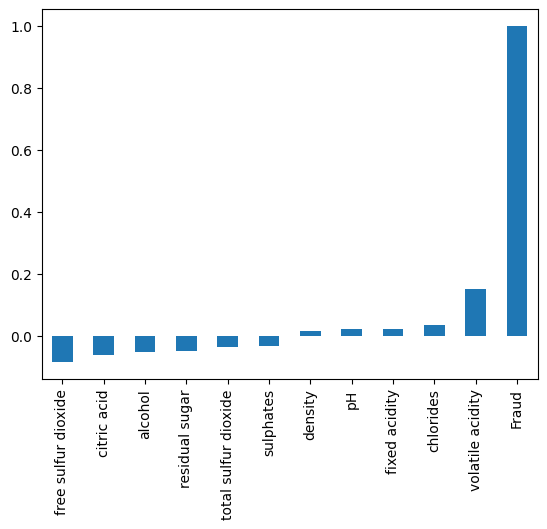

In [20]:
df.corr(numeric_only=True)['Fraud'].sort_values().plot(kind='bar')

<Axes: >

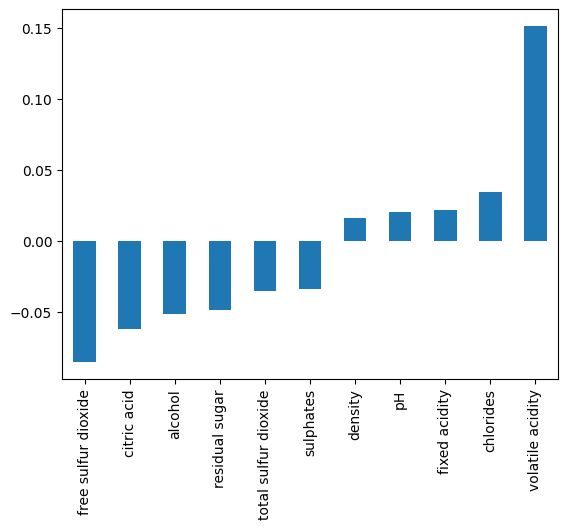

In [21]:
df.corr(numeric_only=True)['Fraud'][:-1].sort_values().plot(kind='bar')

Исследуем связи между переменными

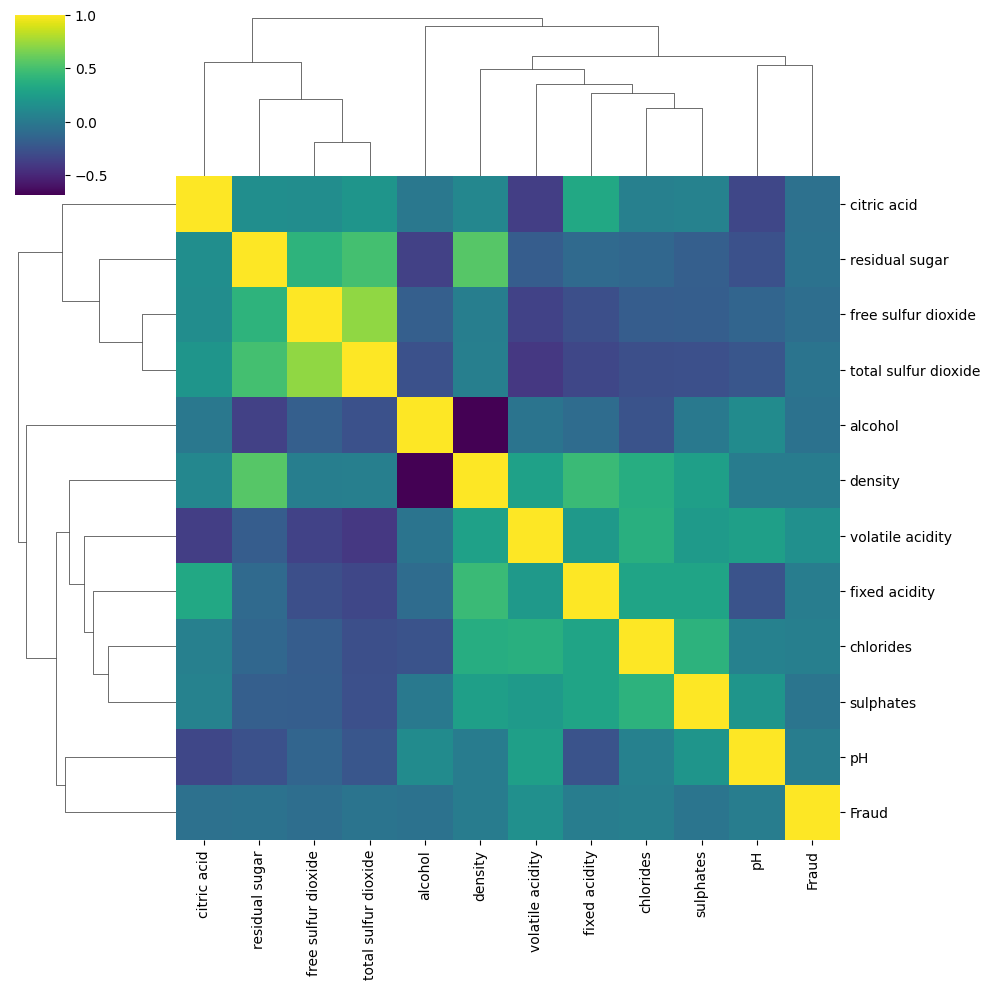

In [22]:
sns.clustermap(df.corr(numeric_only=True), cmap='viridis')

**Построим модель машинного обучения**

Удалим колонку Fraud и сконвертируем категориальную колонку type тз тестовых значений red и white в dummy-переменные

In [23]:
df = df.drop('Fraud', axis=1)

In [24]:
df['type'] = pd.get_dummies(df['type'], drop_first=True)

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [25]:
X = df.drop('quality', axis=1)
y = df['quality']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

Проведем масштабирование признаков

In [29]:
sclaler = StandardScaler()

In [30]:
scaled_X_train = sclaler.fit_transform(X_train)
scaled_X_test = sclaler.transform(X_test)

Поскольку классы не сбалансированы, создадим модель SVM классификации с автоматическим подбором веса обратно пропорционально тому, как часто встречаются классы во входных переменных (class_weigth). Увеличим веса (значение класса Fraud), посколько он встречается редко. Тем самым мы уменьшим негативные последствия того, что классы не сбалансированы. 

In [34]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [35]:
svc = SVC(class_weight='balanced')

Проведем подбор гиперпараметров поиском по сетке

In [49]:
param_grid = {'C': [0.0001, 0.001, 0.01, 0.1, 0.5, 1, 2], 'gamma': ['scale', 'auto'], 'kernel': ["linear", "poly", "rbf"]}
grid = GridSearchCV(svc, param_grid)

In [50]:
grid.fit(scaled_X_train, y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf']})

In [51]:
grid.best_params_

{'C': 0.0001, 'gamma': 'scale', 'kernel': 'poly'}

Проведем оценку результатов для нашей модели

In [52]:
from sklearn.metrics import confusion_matrix, classification_report

In [53]:
grid_preds = grid.predict(scaled_X_test)

In [54]:
confusion_matrix(y_test, grid_preds)

array([[  0,  27],
       [  1, 622]])

Модель работает не очень хорошо. Ошибочно классифицированы 1 + 27 точек

In [55]:
print(classification_report(y_test, grid_preds))

              precision    recall  f1-score   support

       Fraud       0.00      0.00      0.00        27
       Legit       0.96      1.00      0.98       623

    accuracy                           0.96       650
   macro avg       0.48      0.50      0.49       650
weighted avg       0.92      0.96      0.94       650



In [56]:
final_model = SVC(class_weight='balanced', C=0.0001, gamma='scale', kernel='poly')

In [ ]:
final_scaler = StandardScaler()